11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1443 - accuracy: 0.9555 - val_loss: 0.0427 - val_accuracy: 0.9867
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0455 - accuracy: 0.9862 - val_loss: 0.0403 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0277 - val_accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0352 - val_accuracy: 0.9899
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.0304 - accuracy: 0.9913

✅ Test Accuracy: 0.9913
1/1 [==============================] - 0s 148ms/step


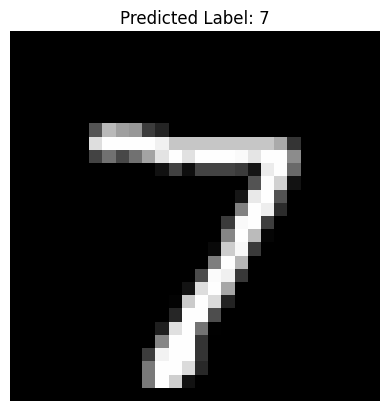

In [1]:
# ✅ Import libraries
import tensorflow as tf   #library used to build and train neural networks
from tensorflow.keras import layers, models    #Used to create layers (like convolutional, dense) and build models
import matplotlib.pyplot as plt     #Used for showing images/graphs
import numpy as np             #Used for numerical operations like reshaping arrays

# ✅ Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()         #Loads the MNIST dataset (70,000 handwritten digits),It automatically splits the data into training and testing sets

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0                    #Pixel values range from 0 to 255. Dividing by 255 normalizes them to 0–1
x_test = x_test / 255.0                      #This helps the model train better and faster

# Reshape images to (28, 28, 1) for CNN input,Each MNIST image is 28 pixels wide and 28 pixels tall — that's (28, 28).But to feed the image into a Convolutional Neural Network (CNN), we need to tell the model how many color channels the image has.
x_train = x_train.reshape(-1, 28, 28, 1)              #Adds a channel dimension (for grayscale images) so that each image is shaped as (28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)                 #Grayscale images (like MNIST digits) have 1 channel → shape: (28, 28, 1),Color images have 3 channels (Red, Green, Blue) → shape: (28, 28, 3)

# ✅ Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)), #Finds patterns like lines, curves, etc., in the image
    layers.MaxPooling2D(pool_size=(2, 2)),          #Reduces the size of the image (keeps important info)

    layers.Conv2D(64, (3, 3), activation='relu'),       
    layers.MaxPooling2D(pool_size=(2, 2)),            

    layers.Flatten(),                                      #Converts 2D image into a 1D vector for the Dense layers
    layers.Dense(64, activation='relu'),                        #Fully connected layer with 64 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9), Final layer with 10 outputs for digits 0–9. Uses softmax to give probabilities
])

# ✅ Compile the model
model.compile(optimizer='adam',           # Optimization algorithm (makes training efficient)
              loss='sparse_categorical_crossentropy',                 #Suitable loss for classification of integer labels
              metrics=['accuracy'])                             #Metric to track during training
  
# ✅ Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))          #Trains the model using the training data, Runs for 5 full passes over the dataset (epochs),Also checks accuracy on test data after each epoch

# ✅ Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)              #Checks how good the model is on unseen test images
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# ✅ Predict the label of the first test image
prediction = model.predict(x_test[0:1])                      #Predicts the class (digit) for the first image in the test set
predicted_label = np.argmax(prediction)                      #np.argmax finds which digit has the highest predicted probability

# ✅ Show prediction with the image
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
